# Exercise 5

In [1]:
# Done by Timo Marks
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import mnist
subplot_keywords = {"xticks": [0,27], "yticks": [0,27]}

## Function for:
## Task 2/3: Loading image data
## Task 4: Converting data matrix to feature vector, and normalization
## Task 5: Adding a row of dummy ones to the feature vector to avoid offset term

In [70]:
def MnistRead():
    train_images = mnist.train_images()
    train_labels = mnist.train_labels()

    test_images = mnist.test_images()
    test_labels = mnist.test_labels()

    print('train_images: ' + str(train_images.shape))
    print('train_labels: ' + str(train_labels.shape))
    print('test_images:  '  + str(test_images.shape))
    print('test_labels:  '  + str(test_labels.shape))
    return [train_images, train_labels, test_images, test_labels]

# Creates num_grid * num_grid subplot of images
def MnistShow(images, num_grid = 4):
    plt.set_cmap("gray")
    fig, ax = plt.subplots(num_grid, num_grid, figsize=(10,10), sharex=True, sharey=True, subplot_kw = subplot_keywords)
    for i in range(num_grid):
        for j in range(num_grid):
            ax[i,j].imshow(images[i*num_grid+j])
    plt.show()

# Add dummy 1 to the beginning of each feature vector
def add_dummy_ones(matrix):
    images = np.insert(matrix[0],0,1,axis=0)
    for mat in matrix[1:]:
        images = np.column_stack([images, np.insert(mat,0,1)])
    return images

# Create a feature vector of each image
def matrix2vector(images):
    images = images.reshape(images.shape[0], (images.shape[1] * images.shape[2]))
    images = add_dummy_ones(images)
    return np.transpose(images)

# Inverse transformation of feature vector in image
def vector2matrix(feature_vector, NCol, NRow):
    feature_vector = np.transpose(feature_vector)
    return feature_vector.reshape((feature_vector.shape[0], NCol, NRow))

# Normalization: Gray Value from 0 to 1
def normalize(images):
    return images/np.max(images)




### 1. Read in Data and Visualization

train_images: (60000, 28, 28)
train_labels: (60000,)
test_images:  (10000, 28, 28)
test_labels:  (10000,)


<Figure size 432x288 with 0 Axes>

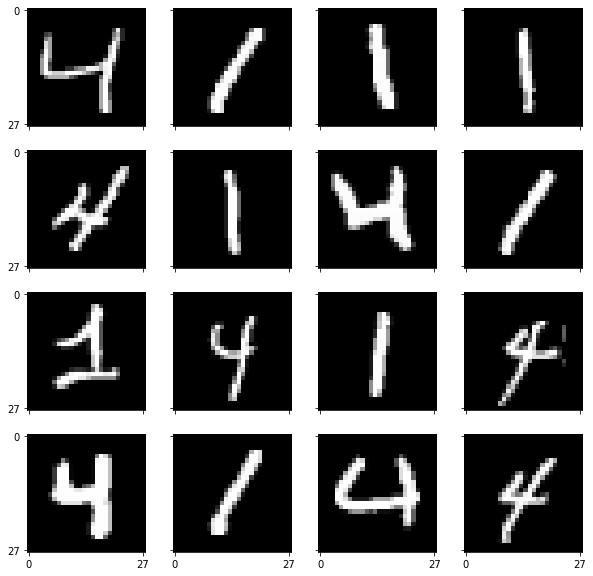

<Figure size 432x288 with 0 Axes>

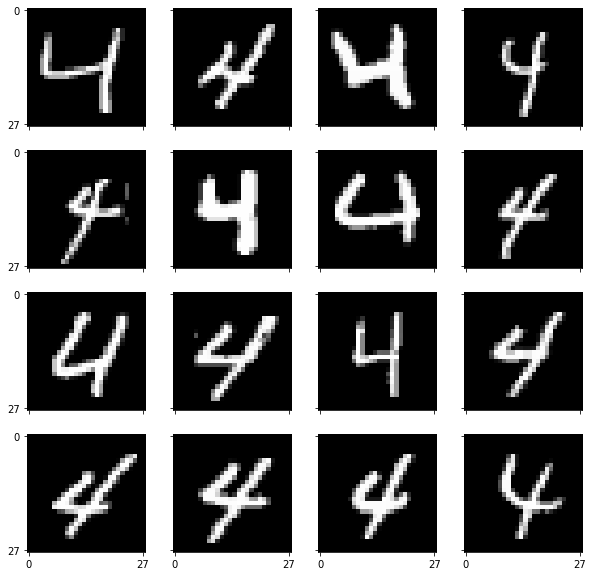

In [10]:
[train_images, train_labels, test_images, test_labels] = MnistRead()
train_images = normalize(train_images)
test_images = normalize(test_images)


# Pick out specific numbers
digit_A = 1
digit_B = 4

# Array containing both numbers
train_labels_mask = np.asarray(train_labels[:] == digit_A) | np.asarray(train_labels[:] == digit_B)
train_images, train_labels = train_images[train_labels_mask,:,:], train_labels[train_labels_mask]

test_labels_mask = np.asarray(test_labels[:] == digit_A) | np.asarray(test_labels[:] == digit_B)
test_images, test_labels = test_images[test_labels_mask,:,:], test_labels[test_labels_mask]

# Array containing only the specific numbers
train_images_digit_A = train_images[train_labels[:] == digit_A,:,:]
train_labels_digit_A = train_labels[train_labels[:] == digit_A]

train_images_digit_B = train_images[train_labels[:] == digit_B,:,:]
train_labels_digit_B = train_labels[train_labels[:] == digit_B]

test_images_digit_A = test_images[test_labels[:] == digit_A,:,:]
train_labels_digit_A = test_labels[test_labels[:] == digit_A]

test_images_digit_B = test_images[test_labels[:] == digit_B,:,:]
test_labels_digit_B = test_labels[test_labels[:] == digit_B]

MnistShow(train_images) # Both digits
MnistShow(train_images_digit_B) # Digit_B got sorted out

## Task 4 Converting data matrix to feature vector: Test Images
If this fails, the upcoming calculation are not correct. Make sure the images are the same

Text(0.5, 1.0, 'Inverse transformation of transformed\nimage. Should be the same.')

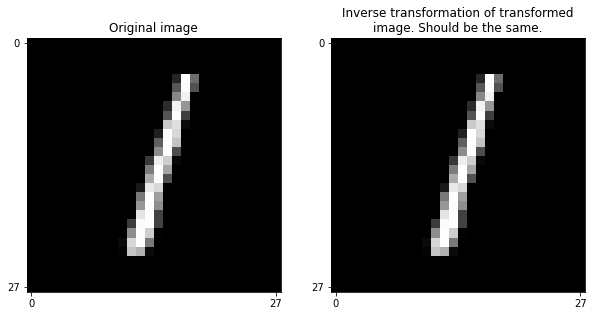

In [11]:
(NFrame, NRow, NCol) = test_images.shape
feature_vectors = matrix2vector(test_images)
images = vector2matrix(feature_vectors, NRow, NCol)

fig, ax = plt.subplots(1,2, figsize=(10,5), subplot_kw=subplot_keywords)
ax[0].imshow(test_images[0])
ax[1].imshow(images[0])
ax[0].set_title("Original image")
ax[1].set_title("Inverse transformation of transformed\nimage. Should be the same.")

### 5. Perform linear discriminant analysis

In [12]:
def learn_lda(mat_X_digitA, mat_X_digitB, mat_X_digit, weights_filename = "vec_w_opt_lda", vec_y_filename = "vec_y_lda"):
    n_1 = mat_X_digitA.shape[1]
    m_1 = 1.0/n_1 * np.sum(mat_X_digitA, axis=1)
    m_1 = m_1.reshape(m_1.shape[0],1)
    
    # Create matrix of ones, so we artificially copy m_1 to new columns for a matrix 
    # This is helpful for mat_X_digitA - m_1
    ones = np.ones(mat_X_digitA.shape[1]).reshape(1, mat_X_digitA.shape[1])
    m_1_mat = np.matmul(m_1, ones)
    print(f"Step 1 / 5: Shape m_1_mat: {m_1_mat.shape} Shape mat_X_digitA: {mat_X_digitA.shape}")
    S_1 = np.matmul((mat_X_digitA-m_1_mat), np.transpose(mat_X_digitA-m_1_mat))

    # Same for digit B
    n_2 = mat_X_digitB.shape[1]
    m_2 = 1.0/n_2 * np.sum(mat_X_digitB, axis=1)
    m_2 = m_2.reshape(m_2.shape[0],1)
    
    ones = np.ones(mat_X_digitB.shape[1]).reshape(1, mat_X_digitB.shape[1])
    m_2_mat = np.matmul(m_2, ones)
    print(f"Step 2 / 5: Shape m_2_mat: {m_2_mat.shape} Shape mat_X_digitB: {mat_X_digitB.shape}")
    S_2 = np.matmul((mat_X_digitB-m_2_mat), np.transpose(mat_X_digitB-m_2_mat))
    
    S_W = S_1 + S_2
    print(f"Step 3 / 5: Shape S_W: {S_W.shape}")
    
    S_W_inv = np.linalg.pinv(S_W) # Use Moore-Penrose pseudo-inverse of a matrix
    vec_w_opt_lda = np.matmul(S_W_inv, (m_1 - m_2))
    print(f"Step 4 / 5: Shape vec_w_opt_lda: {vec_w_opt_lda.shape}")

    vec_y_lda = compute_output_vec_y(vec_w_opt_lda, mat_X_digit)
    print(f"Step 5 / 5: Shape vec_y_lda: {vec_y_lda.shape}")
    return [vec_w_opt_lda, vec_y_lda, m_1, m_2]

def compute_output_vec_y (vec_w_opt_lda, mat_X):
    return np.matmul(np.transpose(vec_w_opt_lda), mat_X)

def predict_one_y (vec_w_opt_lda, x, digit_A, digit_B):
    vec_y_lda = compute_output_vec_y(vec_w_opt_lda, x)
    if vec_y_lda > 0: 
        return digit_A
    else:
        return digit_B

Step 1 / 5: Shape m_1_mat: (784, 6742) Shape mat_X_digitA: (784, 6742)
Step 2 / 5: Shape m_2_mat: (784, 5842) Shape mat_X_digitB: (784, 5842)
Step 3 / 5: Shape S_W: (784, 784)
Step 4 / 5: Shape vec_w_opt_lda: (784, 1)
Step 5 / 5: Shape vec_y_lda: (1, 12584)


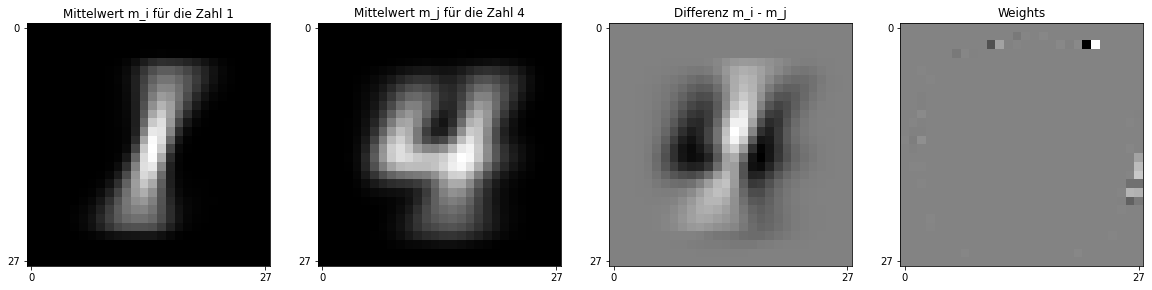

In [13]:
(NFrame, NRow, NCol) = train_images_digit_A.shape
[vec_w_opt_lda, vec_y_lda, m_1, m_2] = learn_lda(matrix2vector(train_images_digit_A), matrix2vector(train_images_digit_B), matrix2vector(train_images))

mat_weights = vec_w_opt_lda.reshape(NRow, NCol)
fig, ax = plt.subplots(1,4,figsize=(20,5), subplot_kw=subplot_keywords)
ax[0].imshow(m_1.reshape(NRow, NCol))
ax[0].set_title(f"Mittelwert m_i für die Zahl {digit_A}")

ax[1].imshow(m_2.reshape(NRow, NCol))
ax[1].set_title(f"Mittelwert m_j für die Zahl {digit_B}")

ax[2].imshow((m_1-m_2).reshape(NRow, NCol))
ax[2].set_title(f"Differenz m_i - m_j")

ax[3].imshow(vec_w_opt_lda.reshape(NRow, NCol))
ax[3].set_title(f"Weights")

plt.show()

### 6 Model Accuracy
The method gives a high accuracy around 97%-99% even when the test data set is used. The Accuracy depends on the used numbers. Numbers which are more similar have a smaller pair accuracy. 

In [14]:
def compute_accuracy(vec_y_lda, vec_y_true, digit_A, digit_B):
    vec = (np.zeros(vec_y_lda.shape[1]))
    vec_y_lda = vec_y_lda.flatten()
    vec[vec_y_lda[:] > 0] = digit_A
    vec[vec_y_lda[:] <= 0] = digit_B
    vec_true_false = vec[vec == vec_y_true]

    return len(vec_true_false)/len(vec_y_true)

In [15]:
vec_y_lda = compute_output_vec_y(vec_w_opt_lda, matrix2vector(train_images))
accuracy = compute_accuracy(vec_y_lda, train_labels, digit_A, digit_B)
print(f"Train data: The Accuracy of the model with digit A: {digit_A} and digit B: {digit_B} is: {accuracy:.5f}")

vec_y_lda = compute_output_vec_y(vec_w_opt_lda, matrix2vector(test_images))
accuracy = compute_accuracy(vec_y_lda, test_labels, digit_A, digit_B)
print(f"Test data:  The Accuracy of the model with digit A: {digit_A} and digit B: {digit_B} is: {accuracy:.5f}")

Train data: The Accuracy of the model with digit A: 1 and digit B: 4 is: 0.99213
Test data:  The Accuracy of the model with digit A: 1 and digit B: 4 is: 0.98725


### 7. Test model with test dataset and show the classification

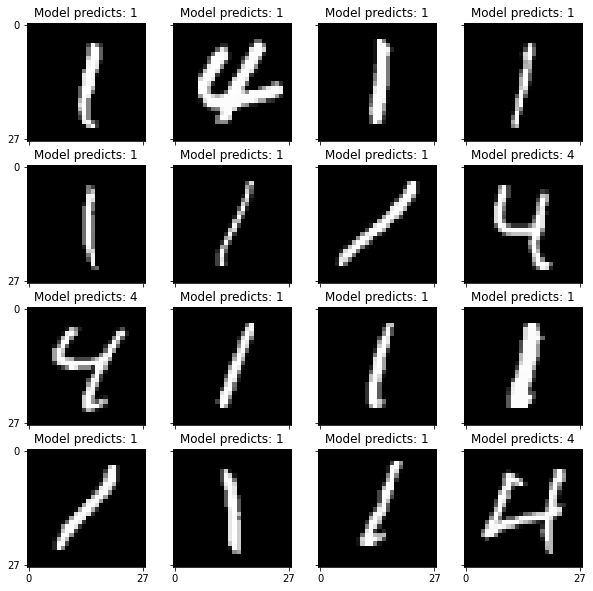

In [16]:
mat_weights = vec_w_opt_lda.reshape(NRow, NCol)

num_grid = 4
fig, ax = plt.subplots(num_grid, num_grid, figsize=(10,10), subplot_kw=subplot_keywords, sharex=True, sharey=True)

# Take some random examples from the test dataset and show the prediction
train_images_digit_A_vec, train_images_digit_B_vec = matrix2vector(train_images_digit_A), matrix2vector(train_images_digit_B)
Test1, Test2, Test3 = train_images_digit_A_vec[:,3], train_images_digit_A_vec[:,600], train_images_digit_B_vec[:,600]

test_images_vec = matrix2vector(test_images)
for i in np.arange(num_grid):
    for j in np.arange(num_grid):
    # Take some random examples from the test dataset and show the prediction
        max_int = test_images_vec.shape[1]
        rand = np.random.randint(0, max_int)
        Example_data = test_images_vec[:,rand]
        prediction = predict_one_y(vec_w_opt_lda, Example_data, digit_A, digit_B)
        ax[i,j].imshow(Example_data.reshape(NRow, NCol))
        ax[i,j].set_title(f"Model predicts: {prediction}")
plt.show()

In [71]:
(NFrame, NRow, NCol) = test_images.shape
feature_vectors = matrix2vector(test_images)

In [63]:
feature_vectorsold = matrix2vectorold(test_images)
a = feature_vectorsold[0]
b= feature_vectors[0]

In [57]:
# Create a feature vector of each image
def matrix2vectorold(images):
    images = images.reshape(images.shape[0], (images.shape[1] * images.shape[2]))
    return np.transpose(images)

In [66]:
mat = feature_vectorsold[0]
np.insert(mat,0,1)

array([1., 0., 0., ..., 0., 0., 0.])

In [72]:
feature_vectors

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])